# Task 4 - Implement 10.16 and 15.4
## Laura Gagnon-Vos 10/05/23
### https://github.com/lauravos/datafun-07-ml-predictive 


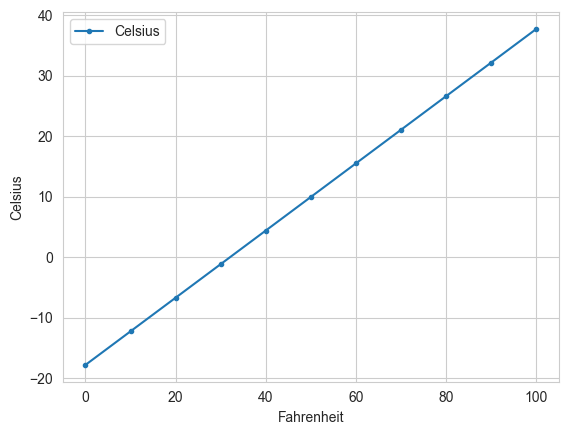

In [321]:
# import pandas
import pandas as pd 
# Use pandas DataFrames to plot Celsius vs Fahrenheit 
c = lambda f: 5 / 9 * (f - 32) #conversion
temps = [(f, c(f)) for f in range(0, 101, 10)] #store as tuple 
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius') 

## Part 1 - Linear Regression

### Section 1 - Load:

In [322]:
# load NY City January high temperature from a csv file into a DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


### Section 2 - View:

In [323]:
# view head
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [324]:
# view tail
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Clean:

In [325]:
# clean the data
nyc.columns = ['Date', 'Temperature', 'Anomaly']
# show 1st 3 rows with 'value' renamed as 'temperature' now
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [326]:
# remove x-axis label from each Date
nyc.Date.dtype

dtype('int64')

In [327]:
#  divide by 100 to cut off last two digits of Date column
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Describe:

In [328]:
# round to 2 digits
pd.set_option('display.precision', 2)

In [329]:
# Use describe() to calculate basic descriptive stats 
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Calculate Line: 

In [330]:
#Use SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
from scipy import stats 

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [331]:
#calculate slope
linear_regression.slope

0.014771361132966163

In [332]:
#calculate intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict: 

In [333]:
#Use results to predict the "average high temp in Jan" for the year 2026
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

### Section 7 - Plot: 
#### Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

(10.0, 70.0)

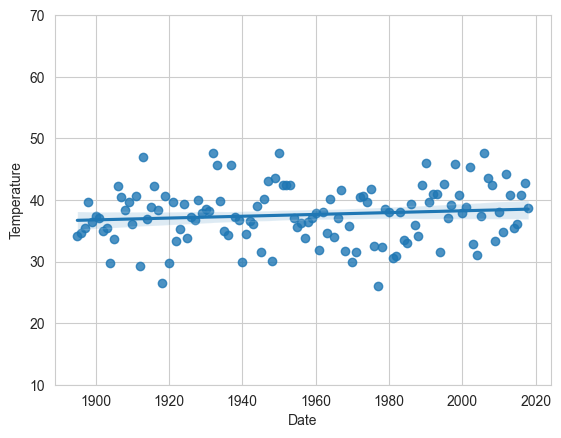

In [334]:
# import seaborn to make scatter plot
import seaborn as sns
# create scatter plot with x axis as date (year) and y as temperature
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
# rescale to show temps from 10-70 degrees
axes.set_ylim(10, 70)

## Part 2 - Machine Learning
#### 15.4 Case Study: Time Series and Simple Linear Regression


### Splitting the Data for Training and Testing

In [335]:
# (loading portion already done in part one)
#split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [336]:
# check train shapes
X_train.shape

(93, 1)

In [337]:
# check test shapes
X_test.shape

(31, 1)

### Train the Model

In [338]:
# train a LinearRegression estimator
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


LinearRegression()

In [339]:
#get slope
linear_regression.coef_

array([0.01939167])

In [340]:
# get intercept
linear_regression.intercept_

-0.30779820252656975

### Test the Model


In [341]:
#  test model using the data in X_test
predicted = linear_regression.predict(X_test)
expected = y_test
# show predicted and expected values for every 5th element
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}') # round to 2 decimals

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures 

In [342]:
# use lambda to implement the equation: y = mx + b
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
# predict temps for 2026 
predict(2026)

array([38.97973189])

In [343]:
#predict a past value 
predict(1880)

array([36.14854759])

### Visualize the Dataset with the Regression Line
#### create a scatter plot of the dataset using Seaborn’s scatterplot function and Matplotlib’s plot function

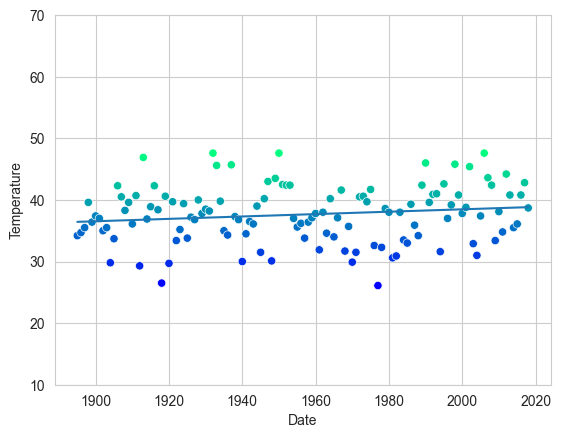

In [344]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
# rescale to show temps from 10-70 degrees
axes.set_ylim(10,70)
#display regression line
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)]) # array with min and max date values
y = predict(x)
import matplotlib.pyplot as plt
line = plt.plot(x, y) #plot line


## Compare Time Series and Simple Linear Regression with Machine Learning, Simple Linear Regression and Predictions.
#### Both 10.16 and 15.4 guide you through using linear regression to examine the same dataset of temperatures in New York City for the month of January from 1895-2018 and allow you to make predictions about temperatures not included within those datasets. I noticed a lot of similarities between the two methods, and both come up with very similar results (both predicted the Jan temp for 2026 to be 38.62 and 38.98, respectively). After using both methods, I think that the machine learning method is probably more efficient 